In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

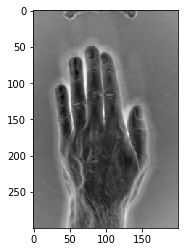

In [7]:
DIR = os.getcwd() + "\\images"

GESTURES = ['paper', 'rock', 'scissors']
for gesture in GESTURES:
    path = os.path.join(DIR, gesture)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), 0)
        img_array = cv2.rotate(img_array, cv2.ROTATE_90_CLOCKWISE)
        plt.imshow(img_array, cmap="binary")
        plt.show
        
        break
    break

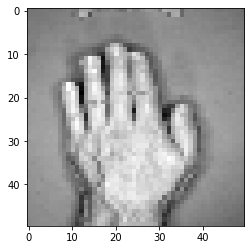

In [8]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
training_data = []

for gesture in GESTURES:
    path = os.path.join(DIR, gesture)
    gesture_id = GESTURES.index(gesture)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), 0)
        img_array = cv2.rotate(img_array, cv2.ROTATE_90_CLOCKWISE)
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([img_array, gesture_id])

In [10]:
len(training_data)

2188

In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
1
2
0
1
2
2
2
1
1


In [13]:
X, y = [], []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

## LAYERS:
* **Dense/Fully**:
Operacje liniowe na macierzach - np. mnożenie
* **Convolutional**:
Hidden layer. Ile ich ma być. Najbardziej lajtowa aktywacja to "relu". Jeśli wartość 'ogniwa' jest mniejsza od 0, przydziela jej wartość 0. "sigmoid z kolei zwraca (-1, 1).
* **Pooling**:
Korzystając z liczb umieszznych w kernelu, np (2, 2) przeszukuje matryce i wybiera z niej największą wartość i tak tworzy nową matrycę.
* **Normalisation**:
Skaluj dane wejściowe, tak aby dane wyjściowe były bliskie zerowej średniej i jednostkowego odchylenia standardowego, aby umożliwić szybszy i odporniejszy training.
* **Dropout**:
![dropout](images/dropout.png)

In [17]:
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(ly.Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(ly.Activation("relu"))

model.add(ly.Conv2D(32, (3, 3), activation="relu"))
model.add(ly.MaxPooling2D(pool_size=(2, 2)))
model.add(ly.Dropout(0.5))

model.add(ly.Flatten())
model.add(ly.Dense(128, activation="relu"))
model.add(ly.Dropout(0.5))
model.add(ly.Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [30]:
import time

T_NAME = "LAYER-{}".format(int(time.time()))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(T_NAME), histogram_freq=1, profile_batch=100000000)

In [31]:
model.fit(X, y, epochs=13, callbacks=[tensorboard])

Train on 2188 samples
Epoch 1/13
2188/2188 [==============================] - 11s 5ms/sample - loss: 0.0199 - acc: 0.9909
Epoch 2/13
2188/2188 [==============================] - 10s 5ms/sample - loss: 0.0305 - acc: 0.9890
Epoch 3/13
2188/2188 [==============================] - 10s 5ms/sample - loss: 0.0624 - acc: 0.9781
Epoch 4/13
2188/2188 [==============================] - 10s 5ms/sample - loss: 0.0329 - acc: 0.9886
Epoch 5/13
2188/2188 [==============================] - 8s 4ms/sample - loss: 0.0222 - acc: 0.9963
Epoch 6/13
2188/2188 [==============================] - 9s 4ms/sample - loss: 0.1156 - acc: 0.9671
Epoch 7/13
2188/2188 [==============================] - 1931s 883ms/sample - loss: 0.0679 - acc: 0.9730
Epoch 8/13
2188/2188 [==============================] - 9s 4ms/sample - loss: 0.0360 - acc: 0.9899
Epoch 9/13
2188/2188 [==============================] - 10s 4ms/sample - loss: 0.0081 - acc: 0.9973
Epoch 10/13
2188/2188 [==============================] - 9s 4ms/sample - loss

In [32]:
def prepare(file):
    img = cv2.imread(file, 0)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    return img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

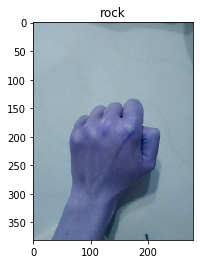

In [38]:
file = "images/test/test1.jpg"
img = prepare(file)
prediction = model.predict(img)

plt.imshow(cv2.imread(file))
plt.title(GESTURES[np.argmax(prediction)])
plt.show()

In [39]:
model.save("RPS.model")